In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("C:/Users/predator/Downloads/bank (1).csv")


In [12]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
data.shape

(45211, 17)

In [14]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:
data.drop(columns = ['default','housing','loan','contact','day','month','duration','pdays','poutcome'], inplace=True)

In [16]:
data

,age,job,marital,education,balance,campaign,previous,deposit
0,58,management,married,tertiary,2143,1,0,no
1,44,technician,single,secondary,29,1,0,no
2,33,entrepreneur,married,secondary,2,1,0,no
3,47,blue-collar,married,unknown,1506,1,0,no
4,33,unknown,single,unknown,1,1,0,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,3,0,yes
45207,71,retired,divorced,primary,1729,2,0,yes
45208,72,retired,married,secondary,5715,5,3,yes
45209,57,blue-collar,married,secondary,668,4,0,no


In [17]:
data.describe()

,age,balance,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,0.580323
std,10.618762,3044.765829,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000
25%,33.000000,72.000000,1.000000,0.000000
50%,39.000000,448.000000,2.000000,0.000000
75%,48.000000,1428.000000,3.000000,0.000000
max,95.000000,102127.000000,63.000000,275.000000


C:\Users\predator\AppData\Local\Temp\ipykernel_10448\180006766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data.corr(), annot=True)


<Axes: >

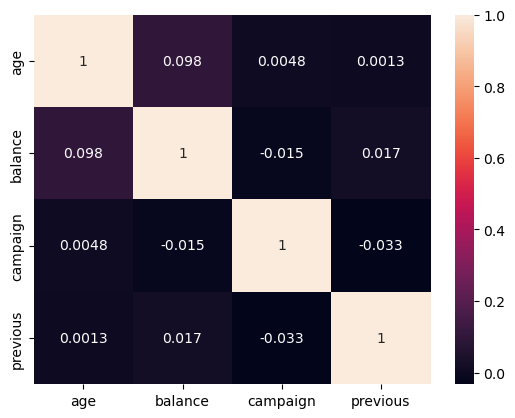

In [18]:
sns.heatmap( data.corr(), annot=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
data['job'] = encoder.fit_transform(data['job'])
data['marital'] = encoder.fit_transform(data['marital'])
data['education'] = encoder.fit_transform(data['education'])
data['campaign'] = encoder.fit_transform(data['campaign'])
data['previous'] = encoder.fit_transform(data['previous'])

In [23]:
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})


In [24]:
data.head()


,age,job,marital,education,balance,campaign,previous,deposit
0,58,4,1,2,2143,0,0,0
1,44,9,2,1,29,0,0,0
2,33,2,1,1,2,0,0,0
3,47,1,1,3,1506,0,0,0
4,33,11,2,3,1,0,0,0


In [25]:
X = data.drop(columns=['deposit'])
y = data['deposit']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.806590733163773


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7952
           1       0.23      0.26      0.25      1091

    accuracy                           0.81      9043
   macro avg       0.57      0.57      0.57      9043
weighted avg       0.82      0.81      0.81      9043



In [31]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- previous <= 0.50
|   |--- age <= 60.50
|   |   |--- age <= 26.50
|   |   |   |--- balance <= 100.50
|   |   |   |   |--- education <= 1.50
|   |   |   |   |   |--- balance <= -834.50
|   |   |   |   |   |   |--- balance <= -968.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- balance >  -968.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- balance >  -834.50
|   |   |   |   |   |   |--- balance <= -191.50
|   |   |   |   |   |   |   |--- campaign <= 0.50
|   |   |   |   |   |   |   |   |--- job <= 1.50
|   |   |   |   |   |   |   |   |   |--- balance <= -241.00
|   |   |   |   |   |   |   |   |   |   |--- balance <= -248.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- balance >  -248.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- balance >  -241.00
|   |   |   |   |   |   |   |   |   |  